In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
#Exponentiated gradient reduction for fair classification
from exponentiated_gradient_reduction import ExponentiatedGradientReduction
#import aif360.algorithms.inprocessing.ExponentiatedGradientReduction
from sklearn.base import BaseEstimator, ClassifierMixin
#Estimator
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "Agar.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
        
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "Agar.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "Agar.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "Agar.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "Agar.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "Agar.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Reductions model
    #clf = LogisticRegression(random_state=0)
    #clf = tree.DecisionTreeClassifier(random_state=0)
    clf =  NB = GaussianNB()
    Reduction = ExponentiatedGradientReduction(prot_attr=protected_attribute,estimator=clf, constraints = "EqualizedOdds")
    Reduction.fit(X_train,y_train)
    y_predicts = Reduction.predict(X_test)
        
    y_pred_probs = Reduction.predict_proba(X_test)
    
                            
                    
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    
    X_test['pred_proba'] = Reduction.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.5847780021891902, 'accuracy': 0.7951923076923076, 'fairness': 0.03263170249809266, 'Positive_prot_pred': 0.8072164948453608, 'Positive_non_prot_pred': 0.8398481973434535, 'Negative_prot_pred': 0.19278350515463918, 'Negative_non_prot_pred': 0.1601518026565465}
Equal opportunity
{'balanced_accuracy': 0.5847780021891902, 'accuracy': 0.7951923076923076, 'fairness': 0.020199466143932643, 'TPR_protected': 0.8354430379746836, 'TPR_non_protected': 0.8556425041186162, 'TNR_protected': 0.2702702702702703, 'TNR_non_protected': 0.34541062801932365}
Equalized odds
{'balanced_accuracy': 0.5847780021891902, 'accuracy': 0.7951923076923076, 'fairness': 0.09533982389298601, 'TPR_protected': 0.8354430379746836, 'TPR_non_protected': 0.8556425041186162, 'TNR_protected': 0.2702702702702703, 'TNR_non_protected': 0.34541062801932365}
Predictive parity
{'balanced_accuracy': 0.5847780021891902, 'accuracy': 0.7951923076923076, 'fairness': 0.18015020957663963, 'TPR_prot

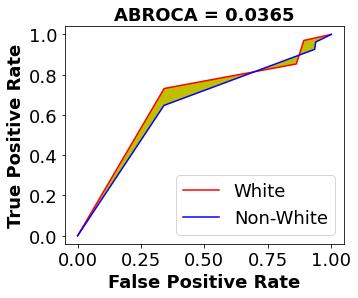

ABROCA: 0.03645298661274888


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.633975080385852, 'accuracy': 0.6614481409001957, 'fairness': -0.00957011121710516, 'Positive_prot_pred': 0.6602687140115163, 'Positive_non_prot_pred': 0.6506986027944112, 'Negative_prot_pred': 0.3397312859884837, 'Negative_non_prot_pred': 0.34930139720558884}
Equal opportunity
{'balanced_accuracy': 0.633975080385852, 'accuracy': 0.6614481409001957, 'fairness': 0.041364516297807796, 'TPR_protected': 0.7420289855072464, 'TPR_non_protected': 0.7833935018050542, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5133928571428571}
Equalized odds
{'balanced_accuracy': 0.633975080385852, 'accuracy': 0.6614481409001957, 'fairness': 0.05475737344066489, 'TPR_protected': 0.7420289855072464, 'TPR_non_protected': 0.7833935018050542, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5133928571428571}
Predictive parity
{'balanced_accuracy': 0.633975080385852, 'accuracy': 0.6614481409001957, 'fairness': 0.07854187473248675, 'TPR_protected': 0.7420289855072464, 'TPR_no

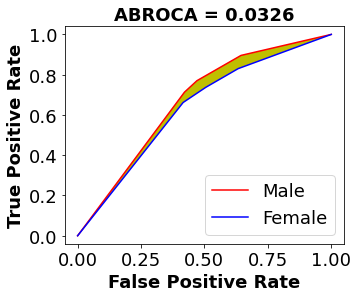

ABROCA: 0.03260391245321708


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.06766917293233077, 'Positive_prot_pred': 0.7894736842105263, 'Positive_non_prot_pred': 0.8571428571428571, 'Negative_prot_pred': 0.21052631578947367, 'Negative_non_prot_pred': 0.14285714285714285}
Equal opportunity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.012383900928792602, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 1.0, 'TNR_non_protected': 0.5}
Equalized odds
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.5123839009287926, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 1.0, 'TNR_non_protected': 0.5}
Predictive parity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.05555555555555558, 'TPR_protected': 0.8823529411764706, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 1.0, 'TNR_non_protected': 0.

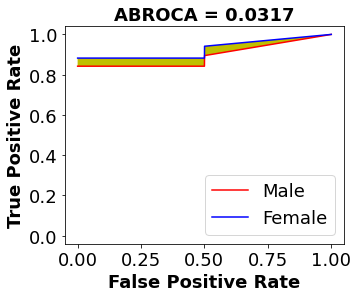

ABROCA: 0.031733746130030965


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.8530375223347231, 'accuracy': 0.8739495798319328, 'fairness': 0.10062182023742228, 'Positive_prot_pred': 0.6206896551724138, 'Positive_non_prot_pred': 0.7213114754098361, 'Negative_prot_pred': 0.3793103448275862, 'Negative_non_prot_pred': 0.2786885245901639}
Equal opportunity
{'balanced_accuracy': 0.8530375223347231, 'accuracy': 0.8739495798319328, 'fairness': 0.016897081413210446, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.7407407407407407, 'TNR_non_protected': 0.7894736842105263}
Equalized odds
{'balanced_accuracy': 0.8530375223347231, 'accuracy': 0.8739495798319328, 'fairness': 0.06563002488299607, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.7407407407407407, 'TNR_non_protected': 0.7894736842105263}
Predictive parity
{'balanced_accuracy': 0.8530375223347231, 'accuracy': 0.8739495798319328, 'fairness': 0.10353535353535348, 'TPR_protect

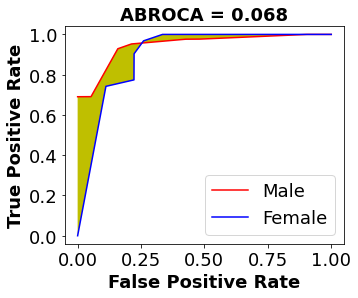

ABROCA: 0.06795906811511113


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.856508875739645, 'accuracy': 0.8923076923076924, 'fairness': -0.020884520884520974, 'Positive_prot_pred': 0.8181818181818182, 'Positive_non_prot_pred': 0.7972972972972973, 'Negative_prot_pred': 0.18181818181818182, 'Negative_non_prot_pred': 0.20270270270270271}
Equal opportunity
{'balanced_accuracy': 0.856508875739645, 'accuracy': 0.8923076923076924, 'fairness': 0.01758409785932713, 'TPR_protected': 0.8990825688073395, 'TPR_non_protected': 0.9166666666666666, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.7142857142857143}
Equalized odds
{'balanced_accuracy': 0.856508875739645, 'accuracy': 0.8923076923076924, 'fairness': 0.21996505024027946, 'TPR_protected': 0.8990825688073395, 'TPR_non_protected': 0.9166666666666666, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.7142857142857143}
Predictive parity
{'balanced_accuracy': 0.856508875739645, 'accuracy': 0.8923076923076924, 'fairness': 0.05769560006848151, 'TPR_protecte

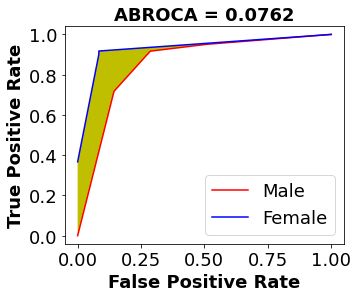

ABROCA: 0.07621732182075656


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.8858585858585859, 'accuracy': 0.8680555555555556, 'fairness': -0.2504935292827375, 'Positive_prot_pred': 0.7659574468085106, 'Positive_non_prot_pred': 0.5154639175257731, 'Negative_prot_pred': 0.23404255319148937, 'Negative_non_prot_pred': 0.4845360824742268}
Equal opportunity
{'balanced_accuracy': 0.8858585858585859, 'accuracy': 0.8680555555555556, 'fairness': 0.09743589743589742, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR_protected': 0.875, 'TNR_non_protected': 0.9459459459459459}
Equalized odds
{'balanced_accuracy': 0.8858585858585859, 'accuracy': 0.8680555555555556, 'fairness': 0.16838184338184337, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR_protected': 0.875, 'TNR_non_protected': 0.9459459459459459}
Predictive parity
{'balanced_accuracy': 0.8858585858585859, 'accuracy': 0.8680555555555556, 'fairness': 0.012222222222222245, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR

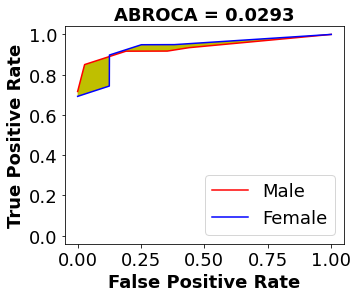

ABROCA: 0.029335939276676402


In [15]:
run_eval('xAPI-Edu')